In [2]:
!pip install numpy

In [3]:
!pip install scipy

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.025e-05 ...  9.950e-03  1.000e-02]
        y: [[ 0.000e+00  4.667e-06 ... -2.781e-09  3.936e-06]
            [ 0.000e+00  3.096e-01 ... -1.897e-01  4.505e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 11612
     njev: 0
      nlu: 0
[ 0.09287065  0.02380103 -0.03543093  0.02887968 -0.00752474 -0.01766709
  0.033842   -0.03268459  0.01478239  0.01070519 -0.03073227  0.03501787
 -0.02140339 -0.00322006  0.02621721 -0.0357795   0.02703204 -0.00441615
 -0.02045243  0.03488066 -0.03145485  0.01189936  0.0137573  -0.03239383
  0.03443477 -0.01886974 -0.00639615  0.02841952 -0.03587475  0.02497535
 -0.00125493 -0.02310368  0.03565469 -0.02996339  0.00889351  0.01673346
 -0.0338144   0.03357272 -0.01615837 -0.00955506  0.03041583 -0.03568577
  0.02269771  0.00194785 -0.02559716  0.03615295 -0.02821847  0.0057889
  0.01960804 -0.03498081  0.032

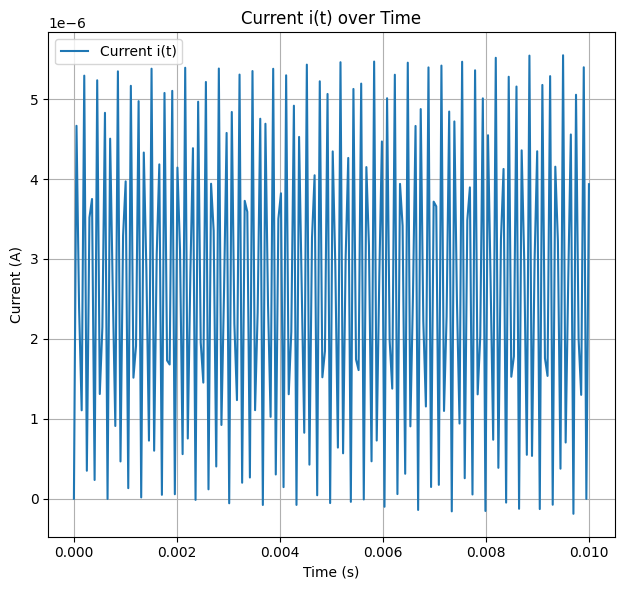

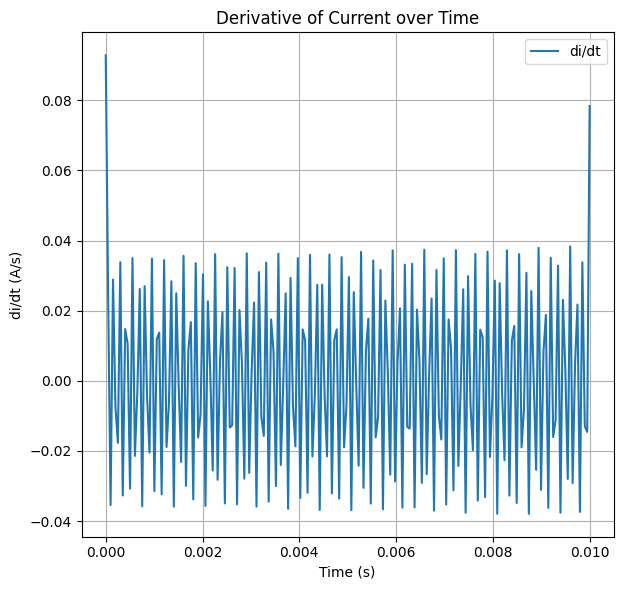

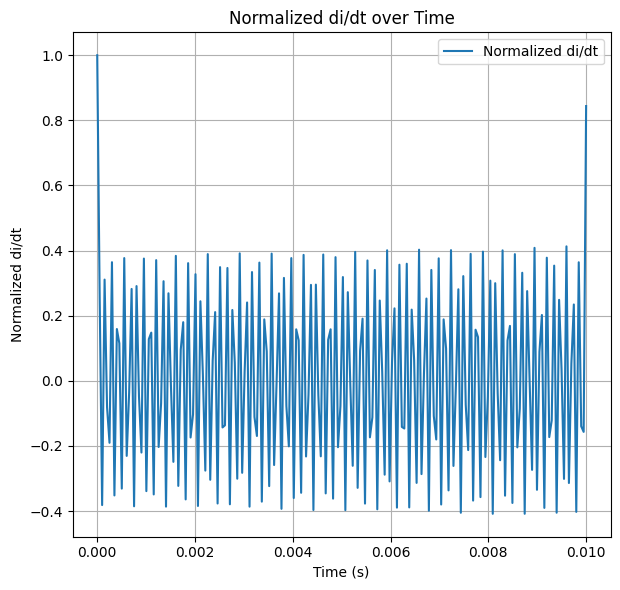

'./normalized_di_dt.txt'

In [19]:

# Constants
mu_0 = 4 * np.pi * 1e-7  # permeability of free space in H/m
mu_r = 1  # relative permeability (for air or vacuum)

V = 400  # voltage in volts
C = 5e-3  # capacitance in farads(F)

coil_inner_diameter_mm = 5  # inner diameter of the coil in cm
R_coil = (coil_inner_diameter_mm / 2) * 1e-3  # coil radius in meters

wire_diameter_awg = 0.6437  # diameter of 22 AWG wire in mm
wire_radius_m = (wire_diameter_awg / 2) * 1e-3  # wire radius in meters
rho_copper = 1.68e-8  # resistivity of copper in ohm-meters

# Calculating Inductance L and Resistance R
length_wire = 2 * np.pi * R_coil  # length of the wire in meters
cross_sectional_area = np.pi * (wire_radius_m**2)  # cross-sectional area in m^2
L = mu_0 * mu_r * R_coil * (np.log(8 * R_coil / wire_radius_m) - 2)  # Inductance in Henries
R = rho_copper * length_wire / cross_sectional_area  # Resistance in Ohms

# Differential equation for the RLC circuit
# def rlc_circuit(t, I, L, R, V, C):
#     i, q = I  # i(t) and q(t) are the current and charge on the capacitor respectively
#     di_dt = (V - R*i - q/C) / L
#     dq_dt = i
#     return [di_dt, dq_dt]


def rlc_circuit(t, I, L, R, V,C):
    i, di_dt = I
    d2i_dt2 = (V - R*di_dt - i/L) / C
    return [di_dt, d2i_dt2]

# Initial conditions
initial_conditions = [0, 0]  # i(0) = 0 A, q(0) = 0 C (uncharged capacitor)

# Time span for the solution in seconds
t_span = (0, 0.01)
t_eval = np.linspace(*t_span, 200)  # 200 Samples collected till eval from 0 to 0.01 s 

# Solve the differential equation
sol = solve_ivp(rlc_circuit, t_span, initial_conditions, args=(L, R, V, C), t_eval=t_eval, method='RK45')

# Compute di/dt and the normalized di/dt
di_dt = np.gradient(sol.y[0], sol.t)
di_dt_max = np.max(np.abs(di_dt))

print(sol)

print(di_dt)

print("di_dt_max  :" )

print(di_dt_max)

normalized_di_dt = di_dt / di_dt_max


print(normalized_di_dt)

# Exporting the normalized di/dt values to a text file
normalized_di_dt_filepath = './normalized_di_dt.txt'
np.savetxt(normalized_di_dt_filepath, normalized_di_dt)

# Plotting the current i(t), its derivative di/dt, and normalized di/dt
plt.figure(figsize=(18, 6))

# Current i(t)
plt.subplot(1, 3, 1)
plt.plot(sol.t, sol.y[0], label='Current i(t)')
plt.title('Current i(t) over Time')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Derivative of current di/dt
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 2)
plt.plot(sol.t, di_dt, label='di/dt')
plt.title('Derivative of Current over Time')
plt.xlabel('Time (s)')
plt.ylabel('di/dt (A/s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Normalized derivative of current normalized di/dt
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 3)
plt.plot(sol.t, normalized_di_dt, label='Normalized di/dt')
plt.title('Normalized di/dt over Time')
plt.xlabel('Time (s)')
plt.ylabel('Normalized di/dt')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Return the file path of the exported data
normalized_di_dt_filepath


In [ ]:
######  Electric Field